In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

import sys

sys.path.append('../src')

from Classes.bar import Bar
from Config.config import PATHS
from Utils.utils import GetMeasurements
from Utils.interaction import Episode, Performer
from Classes.focal_regions import SetFocalRegions
from Classes.cognitive_model_agents import FRAplus

import warnings
warnings.filterwarnings("ignore")

In [2]:
sfr = SetFocalRegions(
    num_agents=2,
    threshold=0.5,
    len_history=2,
)
sfr.generate_focal_regions()

In [3]:
print(sfr)

Region 0
------------------------------------------------------------
[[0. 1.]
 [1. 0.]]
------------------------------------------------------------
Region 1
------------------------------------------------------------
[[1. 1.]
 [0. 0.]]
------------------------------------------------------------



In [4]:
free_parameters = {
    'inverse_temperature': 5.1519804836,
    'learning_rate': 0.19721828,
    'len_history': 3.9714874373,
    'bias': 0.8405926304,
    'c': 0.720431924, 
    'delta': 0.1100910541
}
fixed_parameters = {
    'num_agents': 2,
    'threshold': 0.5,
}
n = 1

<Axes: >

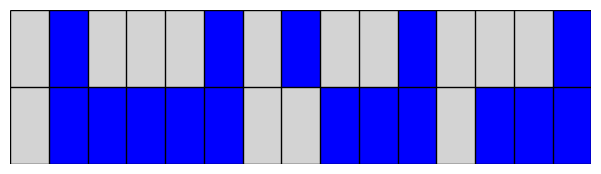

In [5]:
# Create the environment
bar = Bar(
    num_agents=fixed_parameters['num_agents'],
    threshold=fixed_parameters['threshold']
)
# Create the agents
agents = [
    FRAplus(
        free_parameters, 
        fixed_parameters, 
        n
    ) for n in range(fixed_parameters['num_agents'])
]
# Create the episode
episode = Episode(
    model='FRA',
    agents=agents,
    environment=bar,
    num_rounds=50
)

episode.run()

bar.render()

In [76]:
simulation_parameters = {
	'num_rounds': 50,
    'num_episodes': 1,
	'verbose':False
}
rng = np.random.default_rng(42)
deltas = []
df_list = []
for _ in range(20):
    delta = rng.normal(0.1, 0.6)
    delta = np.clip(delta, 0, 1)
    deltas.append(delta)
    free_parameters = {
        'inverse_temperature': 10,
        'learning_rate': 0.19721828,
        'len_history': 2,
        'bias': 0.8405926304,
        'c': 0.9, 
        'delta': delta,
    }
    df = Performer.sim(
        agent_class=FRAplus,
        fixed_parameters=fixed_parameters,
        free_parameters=free_parameters,
        simulation_parameters=simulation_parameters
    )
    df_list.append(df)

df_sim = pd.concat(df_list, ignore_index=True)
df_sim['model'] = 'simulation'

gm = GetMeasurements(
    data=df_sim, measures=['efficiency', 'inequality']
)
data_sim = gm.get_measurements()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [77]:
# Load human data
file_name = '2-player-UR.csv'
file = PATHS['human_data'] / Path(file_name)
print(f'Loading data from {file}...')
df_human = pd.read_csv(file)
df_human['model'] = 'human'

df = pd.concat([df_human, df_sim], ignore_index=True)

# Calculate alternation index per group
gm = GetMeasurements(
    data=df_human,
    measures=['efficiency', 'entropy', 'conditional_entropy', 'bounded_efficiency', 'inequality'],
    T=15
)
data_human = gm.get_measurements()

data = pd.concat([data_sim, data_human], ignore_index=True)

Loading data from /Users/edgar/Documents/GitHub/Cognitive_Models_El_Farol_Bar_Problem/data/human/2-player-UR.csv...


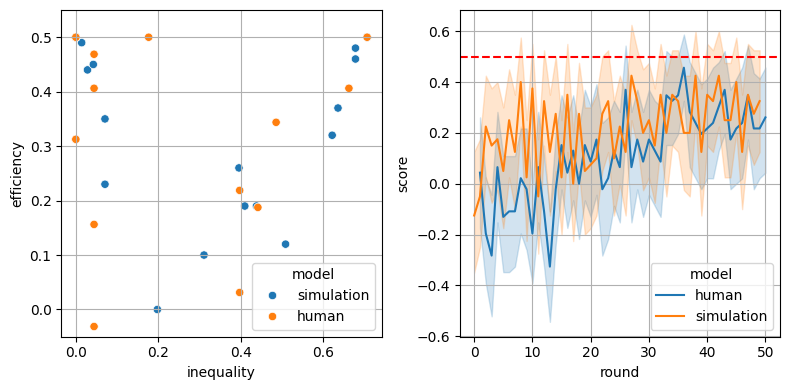

In [78]:
fig, ax = plt.subplots(
    1, 2, 
    figsize=(8,4), 
    tight_layout=True
)

sns.scatterplot(
    x='inequality', y='efficiency',
    hue='model',
    data=data, ax=ax[0]
)
ax[0].grid()
# ax[0].set_xlim([-0.05, 0.6])
ax[0].set_ylim([-0.05, .55])

sns.lineplot(
    x='round', y='score',
    hue='model',
    data=df, ax=ax[1]
)
ax[1].axhline(0.5, ls='--', color='red')
ax[1].grid()

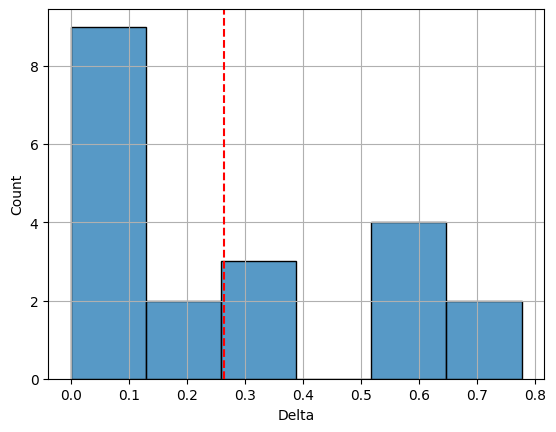

In [79]:
ax = sns.histplot(deltas)
ax.axvline(np.mean(deltas), ls='--', color='red')
ax.set_xlabel('Delta')
ax.grid()